In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ceo = pd.read_csv('ceo_y17.csv')

In [3]:
finstat = pd.read_csv('finstat_y17.csv')

In [4]:
ceo['GVKEY'].nunique(), finstat['gvkey'].nunique()

(1998, 11911)

In [5]:
finstat[finstat['gsector'].isnull()]

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,sale,costat,mkvalt,ggroup,gind,gsector,gsubind
66,1119,20171231,2017.0,INDL,C,D,STD,ADX,USD,NaN,A,NaN,NaN,NaN,NaN,NaN
67,1119,20181231,2018.0,INDL,C,D,STD,ADX,USD,NaN,A,NaN,NaN,NaN,NaN,NaN
68,1119,20191231,2019.0,INDL,C,D,STD,ADX,USD,NaN,A,NaN,NaN,NaN,NaN,NaN
69,1119,20201231,2020.0,INDL,C,D,STD,ADX,USD,NaN,A,NaN,NaN,NaN,NaN,NaN
70,1119,20211231,2021.0,INDL,C,D,STD,ADX,USD,NaN,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56988,264686,20201231,2020.0,INDL,C,D,STD,UTF,USD,NaN,A,NaN,NaN,NaN,NaN,NaN
56989,264686,20211231,2021.0,INDL,C,D,STD,UTF,USD,NaN,A,NaN,NaN,NaN,NaN,NaN
57701,330942,20191231,2019.0,INDL,C,D,STD,BBUS,USD,NaN,A,NaN,NaN,NaN,NaN,NaN
57702,330942,20201231,2020.0,INDL,C,D,STD,BBUS,USD,NaN,A,NaN,NaN,NaN,NaN,NaN


In [6]:
finstat.groupby(['fyear']).count()

,gvkey,datadate,indfmt,consol,popsrc,datafmt,tic,curcd,sale,costat,mkvalt,ggroup,gind,gsector,gsubind
fyear,,,,,,,,,,,,,,,
2016.0,845,845,845,845,845,845,845,845,649,845,546,691,691,691,691
2017.0,10118,10118,10118,10118,10118,10118,10114,10118,6607,10118,5996,7673,7673,7673,7673
2018.0,10652,10652,10652,10652,10652,10652,10648,10652,6832,10652,6205,7930,7930,7930,7930
2019.0,11277,11277,11277,11277,11277,11277,11273,11277,7159,11277,6266,8309,8309,8309,8309
2020.0,11737,11737,11737,11737,11737,11737,11732,11737,7385,11737,6357,8446,8446,8446,8446
2021.0,12145,12145,12145,12145,12145,12145,12140,12145,7464,12145,7135,8351,8351,8351,8351
2022.0,965,965,965,965,965,965,965,965,652,965,636,706,706,706,706


In [7]:
# drop 2022 and 2011 data and missing fyear data
fintwl = finstat[finstat['fyear'].isin([2017, 2018, 2019, 2020, 2021])]
fintwl = fintwl[~fintwl['fyear'].isnull()]

In [8]:
fintwl.shape

(55929, 16)

In [16]:
# drop gsector missing data
fintwl = fintwl[~fintwl['gsector'].isnull()]
fintwl = fintwl[~fintwl['sale'].isnull()]

In [17]:
fintwl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35159 entries, 0 to 40707
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     35159 non-null  int64  
 1   datadate  35159 non-null  int64  
 2   fyear     35159 non-null  float64
 3   indfmt    35159 non-null  object 
 4   consol    35159 non-null  object 
 5   popsrc    35159 non-null  object 
 6   datafmt   35159 non-null  object 
 7   tic       35142 non-null  object 
 8   curcd     35159 non-null  object 
 9   sale      35159 non-null  float64
 10  costat    35159 non-null  object 
 11  mkvalt    27967 non-null  float64
 12  ggroup    35159 non-null  float64
 13  gind      35159 non-null  float64
 14  gsector   35159 non-null  float64
 15  gsubind   35159 non-null  float64
dtypes: float64(7), int64(2), object(7)
memory usage: 4.6+ MB


In [18]:
gvkey = fintwl['gvkey'].unique()

In [19]:
len(gvkey)

7882

In [20]:
fintwl = fintwl.reset_index(drop=True)

In [21]:
fintwl.shape

(35159, 16)

(array([ 289.,    0.,  502.,    0.,    0.,  579.,    0.,  431.,    0.,
        6081.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

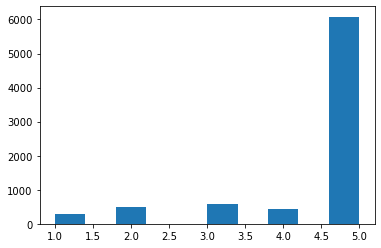

In [22]:
plt.hist(fintwl.groupby('gvkey')['fyear'].count().values)

In [23]:
gvkey[fintwl.groupby('gvkey')['fyear'].count().values != 5].shape

(1801,)

In [24]:
not_5report = gvkey[fintwl.groupby('gvkey')['fyear'].count().values != 5]

In [25]:
# drop missing statement data 
fintwl = fintwl[~fintwl['gvkey'].isin(not_5report)]
fintwl = fintwl.reset_index(drop=True)

In [26]:
fintwl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30405 entries, 0 to 30404
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     30405 non-null  int64  
 1   datadate  30405 non-null  int64  
 2   fyear     30405 non-null  float64
 3   indfmt    30405 non-null  object 
 4   consol    30405 non-null  object 
 5   popsrc    30405 non-null  object 
 6   datafmt   30405 non-null  object 
 7   tic       30390 non-null  object 
 8   curcd     30405 non-null  object 
 9   sale      30405 non-null  float64
 10  costat    30405 non-null  object 
 11  mkvalt    25301 non-null  float64
 12  ggroup    30405 non-null  float64
 13  gind      30405 non-null  float64
 14  gsector   30405 non-null  float64
 15  gsubind   30405 non-null  float64
dtypes: float64(7), int64(2), object(7)
memory usage: 3.7+ MB


In [27]:
fintwl['gvkey'].nunique()

6081

In [28]:
fintwl[['sale', 'mkvalt']].corr(method='spearman').iloc[0, 1]

0.8454568107564452

### clean ceo wage

In [30]:
ceo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48216 entries, 0 to 48215
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EXEC_FULLNAME  48216 non-null  object 
 1   CO_PER_ROL     48216 non-null  int64  
 2   TDC1           46777 non-null  float64
 3   GVKEY          48216 non-null  int64  
 4   YEAR           48216 non-null  int64  
 5   BECAMECEO      12432 non-null  float64
 6   TITLE          46830 non-null  object 
 7   TICKER         48216 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.9+ MB


In [31]:
ceocl = ceo[~ceo['GVKEY'].isin(not_5report)]
ceocl = ceocl[ceocl['YEAR'].isin([2017, 2018, 2019, 2020, 2021])]

In [32]:
ceocl.shape

(46805, 8)

In [33]:
ceocl

,EXEC_FULLNAME,CO_PER_ROL,TDC1,GVKEY,YEAR,BECAMECEO,TITLE,TICKER
0,David P. Storch,5623,6283.565,1004,2017,19961009.0,Chairman & CEO,AIR
1,Timothy J. Romenesko,5626,4139.249,1004,2017,NaN,Vice Chairman,AIR
2,Robert J. Regan,44350,1956.372,1004,2017,NaN,"VP, General Counsel & Secretary",AIR
3,"John McClain Holmes, III",51547,3730.120,1004,2017,20180601.0,"CEO, President & Director",AIR
4,Eric S. Pachapa,55550,689.842,1004,2017,NaN,"VP, Controller & Chief Accounting Officer",AIR
...,...,...,...,...,...,...,...,...
48211,Reid S. Essl,62006,1326.729,328795,2021,NaN,Group President,ACA
48212,Kerry S. Cole,62007,1364.416,328795,2021,NaN,Group President,ACA
48213,"Jesse E. Collins, Jr.",62008,1148.920,328795,2021,NaN,Group President,ACA
48214,Bryan P. Stevenson,64110,1113.560,328795,2021,NaN,Chief Legal Officer,ACA


In [ ]:
# ceocl = ceocl[ceocl['TITLE'].str.contains('Chief Executive Officer|CEO', na=False)]

In [34]:
ceocl = ceocl[~ceocl['TDC1'].isnull()]

In [35]:
ceocl = ceocl.reset_index(drop=True)

In [36]:
ceocl['GVKEY'].nunique()

1921

In [ ]:
ceocl.info()

In [ ]:
# ceocl = ceocl.sort_values(by=['GVKEY', 'YEAR', 'TDC1'], ascending=[True, True, False])

In [ ]:
# ceo = ceocl.groupby(['GVKEY', 'YEAR']).first()

In [ ]:
# ceo = ceo.reset_index()

In [37]:
ceo_gv = ceocl['GVKEY'].unique()

In [38]:
len(ceo_gv)

1921

In [39]:
tdc_count = ceocl.groupby('GVKEY')['YEAR'].nunique()

(array([  85.,    0.,   75.,    0.,    0.,   48.,    0.,   77.,    0.,
        1636.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

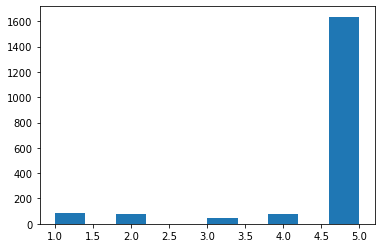

In [40]:
plt.hist(tdc_count.values)

In [41]:
not_5tdc = ceo_gv[tdc_count.values < 5]

In [42]:
not_5tdc

array([  1072,   1094,   1177,   1633,   1920,   1976,   2154,   2393,
         2940,   2942,   3036,   3087,   3310,   3502,   3639,   3707,
         3918,   4072,   4094,   4201,   4274,   4351,   4460,   4523,
         5250,   5379,   5671,   5697,   5918,   5978,   6003,   6081,
         6116,   6196,   6334,   6351,   6532,   6574,   6845,   6900,
         7316,   7346,   7682,   7912,   8240,   8579,   8789,   8815,
         8958,   8972,   9445,   9472,   9589,   9835,  10187,  10190,
        10466,  10631,  10726,  10816,  10981,  10984,  11115,  11296,
        11340,  11896,  11923,  12171,  12215,  12234,  12250,  12403,
        12413,  12796,  12886,  13142,  13189,  13241,  13282,  13375,
        13427,  13599,  13646,  13782,  13800,  13839,  14304,  14412,
        15197,  16531,  16878,  17074,  17130,  17239,  17586,  18291,
        19352,  19906,  20204,  20423,  21047,  21232,  21326,  21739,
        21816,  22325,  22343,  23002,  23220,  23697,  23821,  23988,
      

In [43]:
ceocl = ceocl[~ceocl['GVKEY'].isin(not_5tdc)].reset_index(drop=True)

In [44]:
last_gv = ceocl['GVKEY'].unique()

In [47]:
year = np.arange(2017, 2022, 1)

In [48]:
year

array([2017, 2018, 2019, 2020, 2021])

In [49]:
manager = ceocl.groupby(['GVKEY', 'YEAR'])['TDC1'].mean().reset_index()

In [50]:
manager

,GVKEY,YEAR,TDC1
0,1004,2017,2991.587667
1,1004,2018,1613.066400
2,1004,2019,1705.842833
3,1004,2020,2031.947600
4,1004,2021,3900.146200
...,...,...,...
8175,328795,2017,524.056000
8176,328795,2018,753.056200
8177,328795,2019,1875.520667
8178,328795,2020,1925.096667


In [51]:
fintwl = fintwl[fintwl['gvkey'].isin(last_gv)]
fintwl = fintwl.reset_index(drop=True)

In [55]:
fintwl['gvkey'].nunique(), manager['GVKEY'].nunique()

(1590, 1636)

In [56]:
manager = manager[manager['GVKEY'].isin(fintwl['gvkey'].unique())]

In [57]:
fintwl['gvkey'].nunique(), manager['GVKEY'].nunique()

(1590, 1590)

In [58]:
fintwl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7950 entries, 0 to 7949
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     7950 non-null   int64  
 1   datadate  7950 non-null   int64  
 2   fyear     7950 non-null   float64
 3   indfmt    7950 non-null   object 
 4   consol    7950 non-null   object 
 5   popsrc    7950 non-null   object 
 6   datafmt   7950 non-null   object 
 7   tic       7950 non-null   object 
 8   curcd     7950 non-null   object 
 9   sale      7950 non-null   float64
 10  costat    7950 non-null   object 
 11  mkvalt    7560 non-null   float64
 12  ggroup    7950 non-null   float64
 13  gind      7950 non-null   float64
 14  gsector   7950 non-null   float64
 15  gsubind   7950 non-null   float64
dtypes: float64(7), int64(2), object(7)
memory usage: 993.9+ KB


In [59]:
fintwl = fintwl.fillna(0)

In [60]:
manager.columns = manager.columns.str.lower()

In [61]:
fintwl = fintwl.rename(columns={"fyear": "year"})

In [62]:
fintwl['year'] = fintwl['year'].astype(np.int64)

In [63]:
fintwl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7950 entries, 0 to 7949
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     7950 non-null   int64  
 1   datadate  7950 non-null   int64  
 2   year      7950 non-null   int64  
 3   indfmt    7950 non-null   object 
 4   consol    7950 non-null   object 
 5   popsrc    7950 non-null   object 
 6   datafmt   7950 non-null   object 
 7   tic       7950 non-null   object 
 8   curcd     7950 non-null   object 
 9   sale      7950 non-null   float64
 10  costat    7950 non-null   object 
 11  mkvalt    7950 non-null   float64
 12  ggroup    7950 non-null   float64
 13  gind      7950 non-null   float64
 14  gsector   7950 non-null   float64
 15  gsubind   7950 non-null   float64
dtypes: float64(6), int64(3), object(7)
memory usage: 993.9+ KB


In [64]:
manager.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7950 entries, 0 to 8179
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gvkey   7950 non-null   int64  
 1   year    7950 non-null   int64  
 2   tdc1    7950 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 248.4 KB


In [65]:
fintwl['gvkey'].unique().shape

(1590,)

In [66]:
manager['gvkey'].unique().shape

(1590,)

In [67]:
manager['year'].unique()

array([2017, 2018, 2019, 2020, 2021], dtype=int64)

In [68]:
fintwl['year'].unique().shape

(5,)

In [69]:
fintwl.head()

,gvkey,datadate,year,indfmt,consol,popsrc,datafmt,tic,curcd,sale,costat,mkvalt,ggroup,gind,gsector,gsubind
0,1004,20180531,2017,INDL,C,D,STD,AIR,USD,1748.3,A,1551.4580,2010.0,201010.0,20.0,20101010.0
1,1004,20190531,2018,INDL,C,D,STD,AIR,USD,2051.8,A,1046.7709,2010.0,201010.0,20.0,20101010.0
2,1004,20200531,2019,INDL,C,D,STD,AIR,USD,2089.3,A,707.9065,2010.0,201010.0,20.0,20101010.0
3,1004,20210531,2020,INDL,C,D,STD,AIR,USD,1651.4,A,1476.9063,2010.0,201010.0,20.0,20101010.0
4,1004,20220531,2021,INDL,C,D,STD,AIR,USD,1817.1,A,1706.5540,2010.0,201010.0,20.0,20101010.0


In [70]:
manager.head()

,gvkey,year,tdc1
0,1004,2017,2991.587667
1,1004,2018,1613.066400
2,1004,2019,1705.842833
3,1004,2020,2031.947600
4,1004,2021,3900.146200


In [71]:
fintwl.columns

Index(['gvkey', 'datadate', 'year', 'indfmt', 'consol', 'popsrc', 'datafmt',
       'tic', 'curcd', 'sale', 'costat', 'mkvalt', 'ggroup', 'gind', 'gsector',
       'gsubind'],
      dtype='object')

In [83]:
merged = pd.merge(fintwl, manager, on=['gvkey', 'year'])

In [86]:
merged['gvkey'].nunique()

1590

In [73]:
# Save gvkeys for credit rating queries
np.savetxt('rating_gvkey.txt', merged['gvkey'].unique(), fmt='%s') 

## Add credit rating

In [74]:
rating = pd.read_csv('rating_y17.csv')

In [75]:
rating['gvkey'].nunique()

801

In [76]:
df_len = merged.shape[0]
for k in range(df_len):
    gvkey = merged.loc[k, 'gvkey']
    r = rating[rating['gvkey'] == gvkey]['splticrm'].values
    if r.shape[0] == 0:
        merged.loc[k, 'credit'] = np.nan
    else:
        merged.loc[k, 'credit'] = rating[rating['gvkey'] == gvkey]['splticrm'].values[0]

merged.to_csv('merged_y17_avgmanager.csv', index=False)

In [77]:
merged = pd.read_csv('merged_y17_avgmanager.csv')
# merged = merged[merged['year'].isin([2017, 2018, 2019, 2020, 2021])]
junk_grade = ['CCC+', 'CCC', 'CCC-', 'CC+', 'CC', 'CC-', np.nan, 'nan']
merged = merged[~merged['credit'].isin(junk_grade)]
merged = merged.reset_index(drop=True)

In [78]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     3950 non-null   int64  
 1   datadate  3950 non-null   int64  
 2   year      3950 non-null   int64  
 3   indfmt    3950 non-null   object 
 4   consol    3950 non-null   object 
 5   popsrc    3950 non-null   object 
 6   datafmt   3950 non-null   object 
 7   tic       3950 non-null   object 
 8   curcd     3950 non-null   object 
 9   sale      3950 non-null   float64
 10  costat    3950 non-null   object 
 11  mkvalt    3950 non-null   float64
 12  ggroup    3950 non-null   float64
 13  gind      3950 non-null   float64
 14  gsector   3950 non-null   float64
 15  gsubind   3950 non-null   float64
 16  tdc1      3950 non-null   float64
 17  credit    3950 non-null   object 
dtypes: float64(7), int64(3), object(8)
memory usage: 555.6+ KB


In [79]:
merged['gvkey'].nunique()

790

In [80]:
merged['tic'].unique()

array(['AIR', 'AAL', 'PNW', 'ABT', 'APD', 'ALK', 'HON', 'HES', 'PRI',
       'AEP', 'AXP', 'AFL', 'AIG', 'AME', 'AMGN', 'ADI', 'NBR', 'APA',
       'AAPL', 'AMAT', 'EPAC', 'ADM', 'ARW', 'ASH', 'ADSK', 'ADP', 'AVY',
       'AVT', 'BALL', 'BPOP', 'BK', 'GOLD', 'BAX', 'BDX', 'VZ', 'BRK.B',
       'BBY', 'BIO', 'BKH', 'VAL', 'BA', 'RFP', 'BMY', 'BF.B', 'CAL',
       'BC', 'MTZ', 'UIS', 'CI', 'CNA', 'CSX', 'CBT', 'CACI', 'CPB',
       'STZ', 'CAH', 'CSL', 'CRS', 'CAT', 'LUMN', 'JPM', 'CVX', 'EAT',
       'CHD', 'CHDN', 'CTAS', 'CLX', 'COKE', 'KO', 'CDE', 'CL', 'AON',
       'CMCSA', 'CMA', 'CBSH', 'C', 'CMC', 'CAR', 'DXC', 'CAG', 'ED',
       'CMS', 'COO', 'TAP', 'GLW', 'CR', 'CCK', 'CFR', 'CMI', 'WEN',
       'DAN', 'DHR', 'TGT', 'DE', 'DAL', 'DLX', 'DTE', 'DBD', 'DDS',
       'DIS', 'DG', 'D', 'DOV', 'DD', 'OMC', 'DUK', 'FLS', 'DY', 'PKI',
       'KODK', 'ECL', 'EMR', 'WFRD', 'ATO', 'EFX', 'EQT', 'NEU', 'XOM',
       'FMC', 'NEE', 'FDX', 'FRT', 'M', 'FITB', 'RF', 'TRMK', 'MTB',
       'US

In [82]:
merged[['sale', 'mkvalt']].corr(method='spearman')

,sale,mkvalt
sale,1.000000,0.660054
mkvalt,0.660054,1.000000
